In [1]:
import numpy as np
from numpy import save
import rebound
import random
from multiprocessing import Pool
from myfunctions import SimulationLL as simL
import matplotlib.pyplot as plt
from myfunctions import Plotting0




def HW_crit(e,m):
    # eq 3. from H&W(1999)
    # e,m = eb, mu
    a_crit = 1.6 + 5.1*e - 2.22*e**2 + 4.12*m - 4.27*e*m - 5.09*m**2 + 4.61*e**2*m**2
    return a_crit

if __name__ == "__main__":
    random.seed(1)
    
    #10,30,1,50
    Na1, Na2 = 10, 6
    Ne, Na,Nmu,Np = 10,Na1+(Na2*2)-2,1,15 #Np = number of test particles per (eb,ap)tuple 
#     Ne,Na, Nmu, Np =  1,2,1,2
    #Na = 50
    ab = 1
#     ebs = np.array([0])

    ebs = np.linspace(0.,0.9,Ne) #changed from 0.7 to 0.9 (07/28/22)
    aps = ab*np.linspace(1.,5.,Na)
    mus = np.array([0.5])


 
#     params = [(eb,ap,mu,Np) for eb in ebs for ap in aps for mu in mus]
    params = []
    
    for i,e in enumerate(ebs):
        for j,mu in enumerate(mus):
            ac = HW_crit(e,mu)
            upper, lower = ac*1.15, ac*0.75
            av = np.append(np.linspace(1.,lower, Na2)[:-1],np.linspace(lower,upper,Na1))
            av = np.append(av, np.linspace(upper, 5.,Na2)[1:])
            for a in av:
                params.append((e,a,mu,Np))
                
                
    print(params)            
#     np.save('param_vals.npy',params)
#     nproc = 16 # set to (total = nodes*ppn)
    pool = rebound.InterruptiblePool(processes = 16) #add number of processors same as number requested on Sunnyvale  
    
    import time
    import itertools
    start = time.time()
    num = 1
    for _ in itertools.repeat(None,num):
        stime = pool.map(simL.SimulationLL,params) #survival times
    end = time.time()
    print("Time elapsed in minutes is {}".format((end-start)/60.0))
    
    #print(stime)
    #print(stime.shape)
#     save('stime_eb25_ap25_Mu0.5_Np30_logsp0.npy',stime)

    stime = np.array(stime).reshape([Ne,Na,Nmu,Np])
    stime = np.nan_to_num(stime)
    #stime = stime.T
    print(stime)
    print(stime.shape)
    
#     save('stime_eb25_ap25_Mu0.5_Np30_logsp1.npy',stime)
#     save('STIME_PRACTICE_maxdist_20**2_(1,50,1,30).npy',stime)
#     save('stime_practice_maxdist_20_(10,30,1,50).npy',stime)
          

[(0.0, 1.0, 0.5, 15), (0.0, 1.158125, 0.5, 15), (0.0, 1.3162500000000001, 0.5, 15), (0.0, 1.474375, 0.5, 15), (0.0, 1.6325, 0.5, 15), (0.0, 1.7906250000000001, 0.5, 15), (0.0, 1.8967361111111112, 0.5, 15), (0.0, 2.0028472222222224, 0.5, 15), (0.0, 2.1089583333333333, 0.5, 15), (0.0, 2.2150694444444445, 0.5, 15), (0.0, 2.3211805555555554, 0.5, 15), (0.0, 2.4272916666666666, 0.5, 15), (0.0, 2.533402777777778, 0.5, 15), (0.0, 2.6395138888888887, 0.5, 15), (0.0, 2.745625, 0.5, 15), (0.0, 3.1965, 0.5, 15), (0.0, 3.6473750000000003, 0.5, 15), (0.0, 4.09825, 0.5, 15), (0.0, 4.549125, 0.5, 15), (0.0, 5.0, 0.5, 15), (0.1, 1.0, 0.5, 15), (0.1, 1.2009987500000001, 0.5, 15), (0.1, 1.4019975, 0.5, 15), (0.1, 1.6029962500000001, 0.5, 15), (0.1, 1.803995, 0.5, 15), (0.1, 2.00499375, 0.5, 15), (0.1, 2.1238081944444445, 0.5, 15), (0.1, 2.242622638888889, 0.5, 15), (0.1, 2.3614370833333336, 0.5, 15), (0.1, 2.480251527777778, 0.5, 15), (0.1, 2.5990659722222222, 0.5, 15), (0.1, 2.7178804166666666, 0.5, 15

simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 4 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 2 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
simulation finished, 13 planets remaining
simulation fini

1265.3648873896398


ValueError: 'c' argument has 150 elements, which is inconsistent with 'x' and 'y' with size 200.

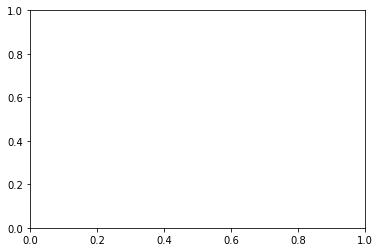

In [6]:
ee,aa = np.array(params)[:,0],np.array(params)[:,1]
c=np.mean(stime)

# print(len(ee))
# print(ee)
# print(len(aa))
# print(aa)
print(c)

plt.scatter(ee,aa,c=np.mean(stime,axis=1),lw=3)
plt.xlabel('$e_{bin}$')
plt.ylabel('$a/a_{bin}$')
plt.tight_layout()
# plt.savefig(workdir+'/mean_stimes.png',bbox_inches="tight")

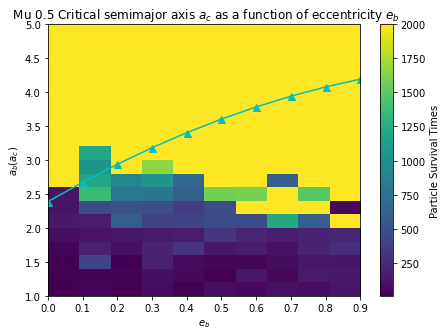

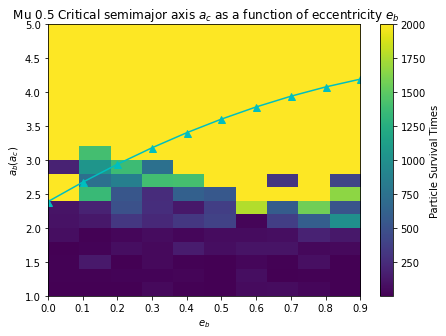

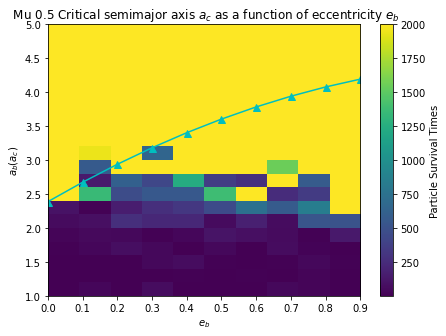

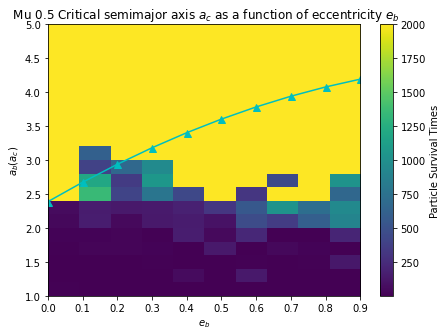

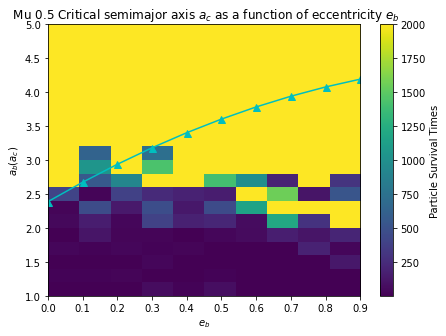

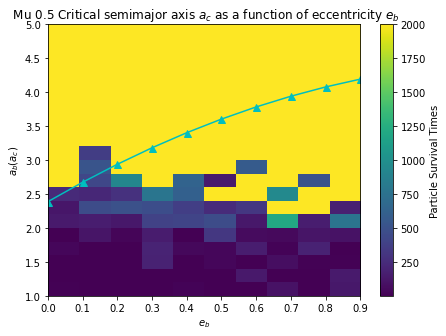

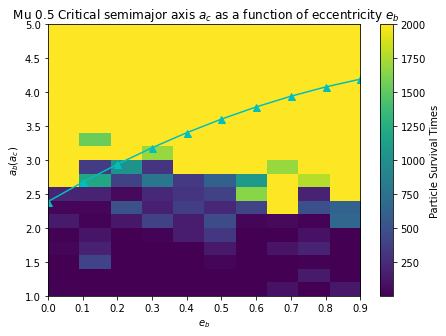

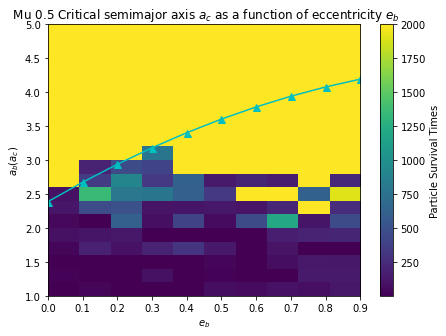

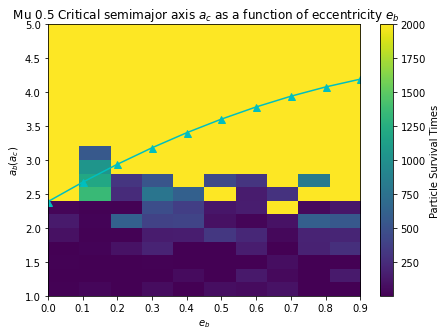

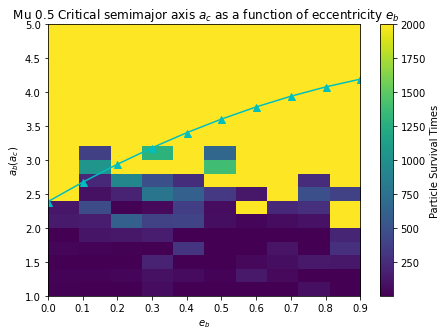

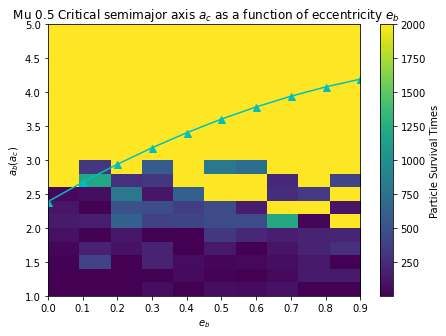

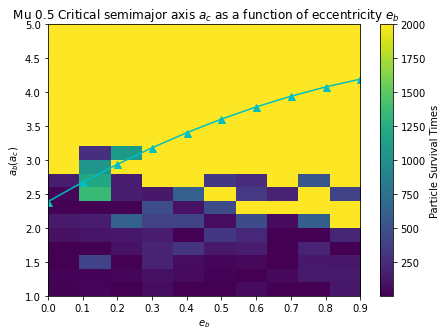

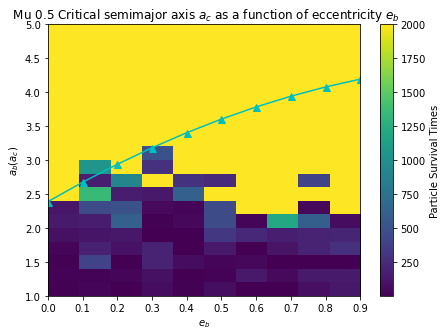

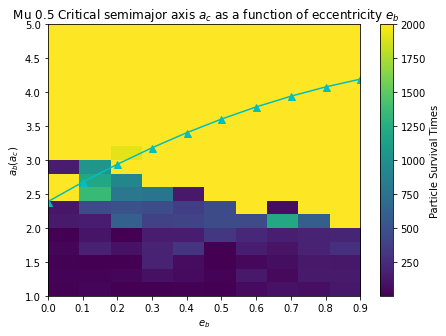

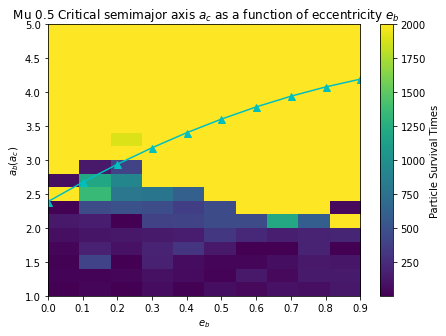

In [3]:
# from myfunctions import Plotting0

# from myfunctions import PlottingLL
# for i,eb in enumerate(ebs):
#     for j,ap in enumerate(aps):
#         for k,mu in enumerate(mus):
#             print(stime[i,j,k,:])
#             PlottingLL.PlottingLL(eb, ap, mu,stime[i,j,k,:],Np) 
            
for i,mu in enumerate(mus):
    for j in range(0,Np):      
        
        Plotting0.Plotting0(ebs,aps,Na, Ne,stime[:,:,i,j].T,mu) 